In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from Modules.data import simulate_travelling_kawahara
from Modules.models import travelKawaharaPinn
from Modules.plots import plot_kdv_model, plot_training_loss

2023-01-29 18:39:54.658754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_start = 0
length = 2*np.pi
time = np.pi / 2
#(tx_samples, y_samples), (tx_init, y_init), (tx_boundary,y_boundary) = simulate_kdv(1000, f_init,boundary_function, x_start, length, time)
(tx_eqn, y_eqn), (tx_init, y_init), (tx_boundary, y_boundary) = simulate_travelling_kawahara(1000, length =length, time = time, random_seed = 42, dtype=tf.float32) 

2023-01-29 18:40:03.349722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
network = travelKawaharaPinn.build_network([32, 64])
model = travelKawaharaPinn(network) # add alpha beta sigma if not default
model.compile()

In [4]:
inputs = tf.stack([tx_eqn, tx_init, tx_boundary], axis=0)
outputs = tf.stack([y_init, y_boundary], axis=0)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [5]:
history = model.fit(inputs, outputs, 10000, optimizer, progress_interval=200)

Epoch: 0 Loss: 1.0388 Total Elapsed Time: 34.97
Epoch: 200 Loss: 0.0001 Total Elapsed Time: 61.92
Epoch: 400 Loss: 0.0000 Total Elapsed Time: 87.44
Epoch: 600 Loss: 0.0000 Total Elapsed Time: 115.43
Epoch: 800 Loss: 0.0000 Total Elapsed Time: 141.48
Epoch: 1000 Loss: 0.0000 Total Elapsed Time: 168.94
Epoch: 1200 Loss: 0.0000 Total Elapsed Time: 195.25
Epoch: 1400 Loss: 0.0000 Total Elapsed Time: 223.33
Epoch: 1600 Loss: 0.0000 Total Elapsed Time: 254.76
Epoch: 1800 Loss: 0.0000 Total Elapsed Time: 279.27
Epoch: 2000 Loss: 0.0000 Total Elapsed Time: 306.78
Epoch: 2200 Loss: 0.0000 Total Elapsed Time: 333.21
Epoch: 2400 Loss: 0.0000 Total Elapsed Time: 359.04
Epoch: 2600 Loss: 0.0000 Total Elapsed Time: 384.95
Epoch: 2800 Loss: 0.0000 Total Elapsed Time: 411.21
Epoch: 3000 Loss: 0.0000 Total Elapsed Time: 441.93
Epoch: 3200 Loss: 0.0000 Total Elapsed Time: 468.03
Epoch: 3400 Loss: 0.0000 Total Elapsed Time: 491.21
Epoch: 3600 Loss: 0.0000 Total Elapsed Time: 517.76
Epoch: 3800 Loss: 0.00

1/1 [==============================] - 0s 46ms/step


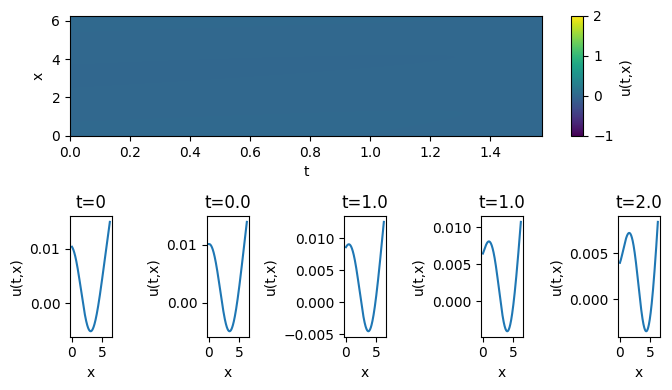

In [6]:
plot_kdv_model(model.network, x_start, length, time)



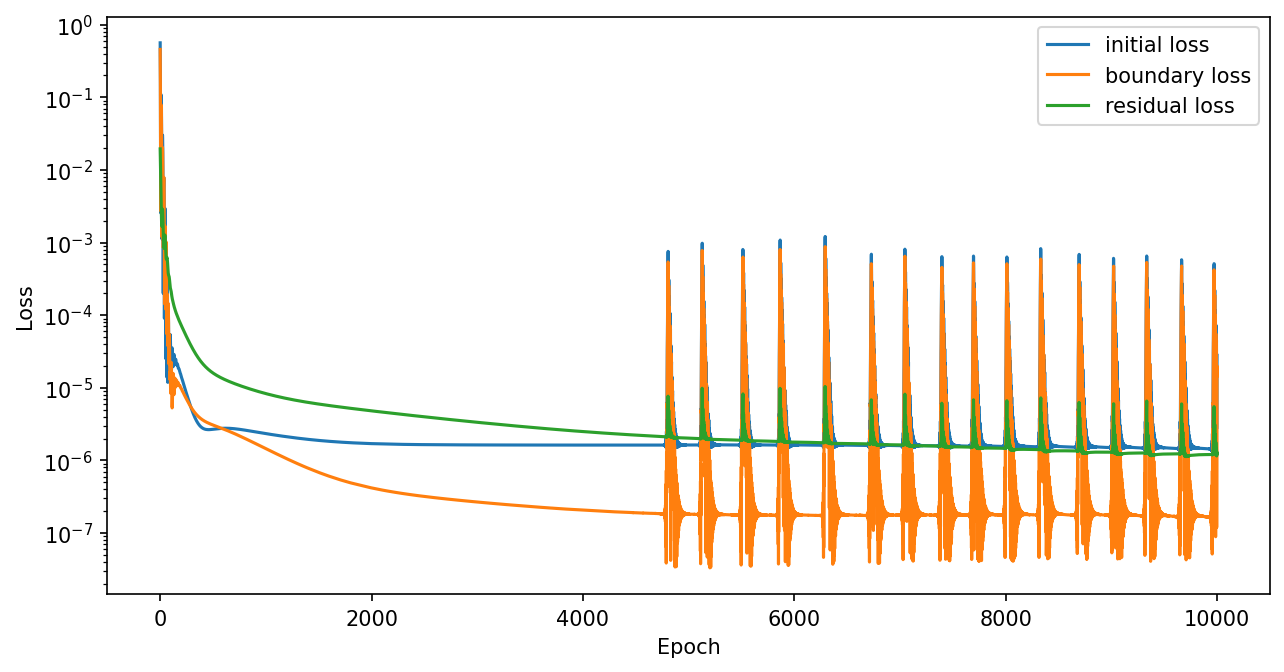

In [7]:
plot_training_loss(history, y_scale='log')